In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib
from matplotlib import patheffects

import seaborn as sns

_30k_main = {
    "blue": "#202F66",
    "orange": "#FF7048",
    "purple": "#8B87EA",
    "pink": "#D869AB",
    "cyan": "#54C9B9",
    "yellow": "#F3D36E",
}

_30k_danger_safe = {
    "danger": "#FF4F72",
    "safe": "#58EDB9",
}

_30k_text = {
    "text_black": "#32363A",
    "text_lighter1": "#6F7273",
    "text_lighter2": "#8B8E8F",
    "grey1": "#aeb7bc",
    "grey2": "#c3cace",
    "grey3": "#d9dde0",
    "bg_cream": "#FAF7F4"
}

_font_mono = "Inconsolata"
_font_serif = "Canela Text"
_font_sans = "Gill Sans"

plt.style.use("./utils/-30k.mplstyle")

_30k = list(_30k_main.values())
sns.set_palette(_30k)

# ← → ↓ ↑


def _30k_path_effects(linewidth=2.5, foreground=_30k_text['bg_cream'], alpha=1.0, **kwargs):
    return [patheffects.withStroke(linewidth=linewidth, foreground=foreground, alpha=alpha, **kwargs)]

import warnings

warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("./csv/multiprocessing-mkt.csv")

In [3]:
df1.head()

,pool_size,n,num_grids,time_s
0,2,20,5000,1.145423
1,2,20,7500,1.601490
2,2,20,8000,1.700099
3,2,20,10000,2.072802
4,2,20,20000,3.952936


In [4]:
df2 = pd.read_csv("./csv/singleprocessing-mkt.csv")

In [5]:
df2['pool_size'] = 1
df2.head()

,n,num_grids,time_s,pool_size
0,20,5000,1.839498,1
1,20,7500,2.733240,1
2,20,8000,2.909303,1
3,20,10000,3.639190,1
4,20,20000,7.269877,1


In [6]:
df = pd.concat([df1, df2])

In [7]:
df = df.sort_values(by=['pool_size', 'num_grids', 'n'], ignore_index=True)

In [8]:
df

,pool_size,n,num_grids,time_s
0,1,20,5000,1.839498
1,1,25,5000,2.011961
2,1,40,5000,2.650369
3,1,50,5000,3.062860
4,1,75,5000,4.112943
...,...,...,...,...
600,8,100,100000,14.061656
601,8,200,100000,26.966787
602,8,250,100000,32.694710
603,8,400,100000,57.492420


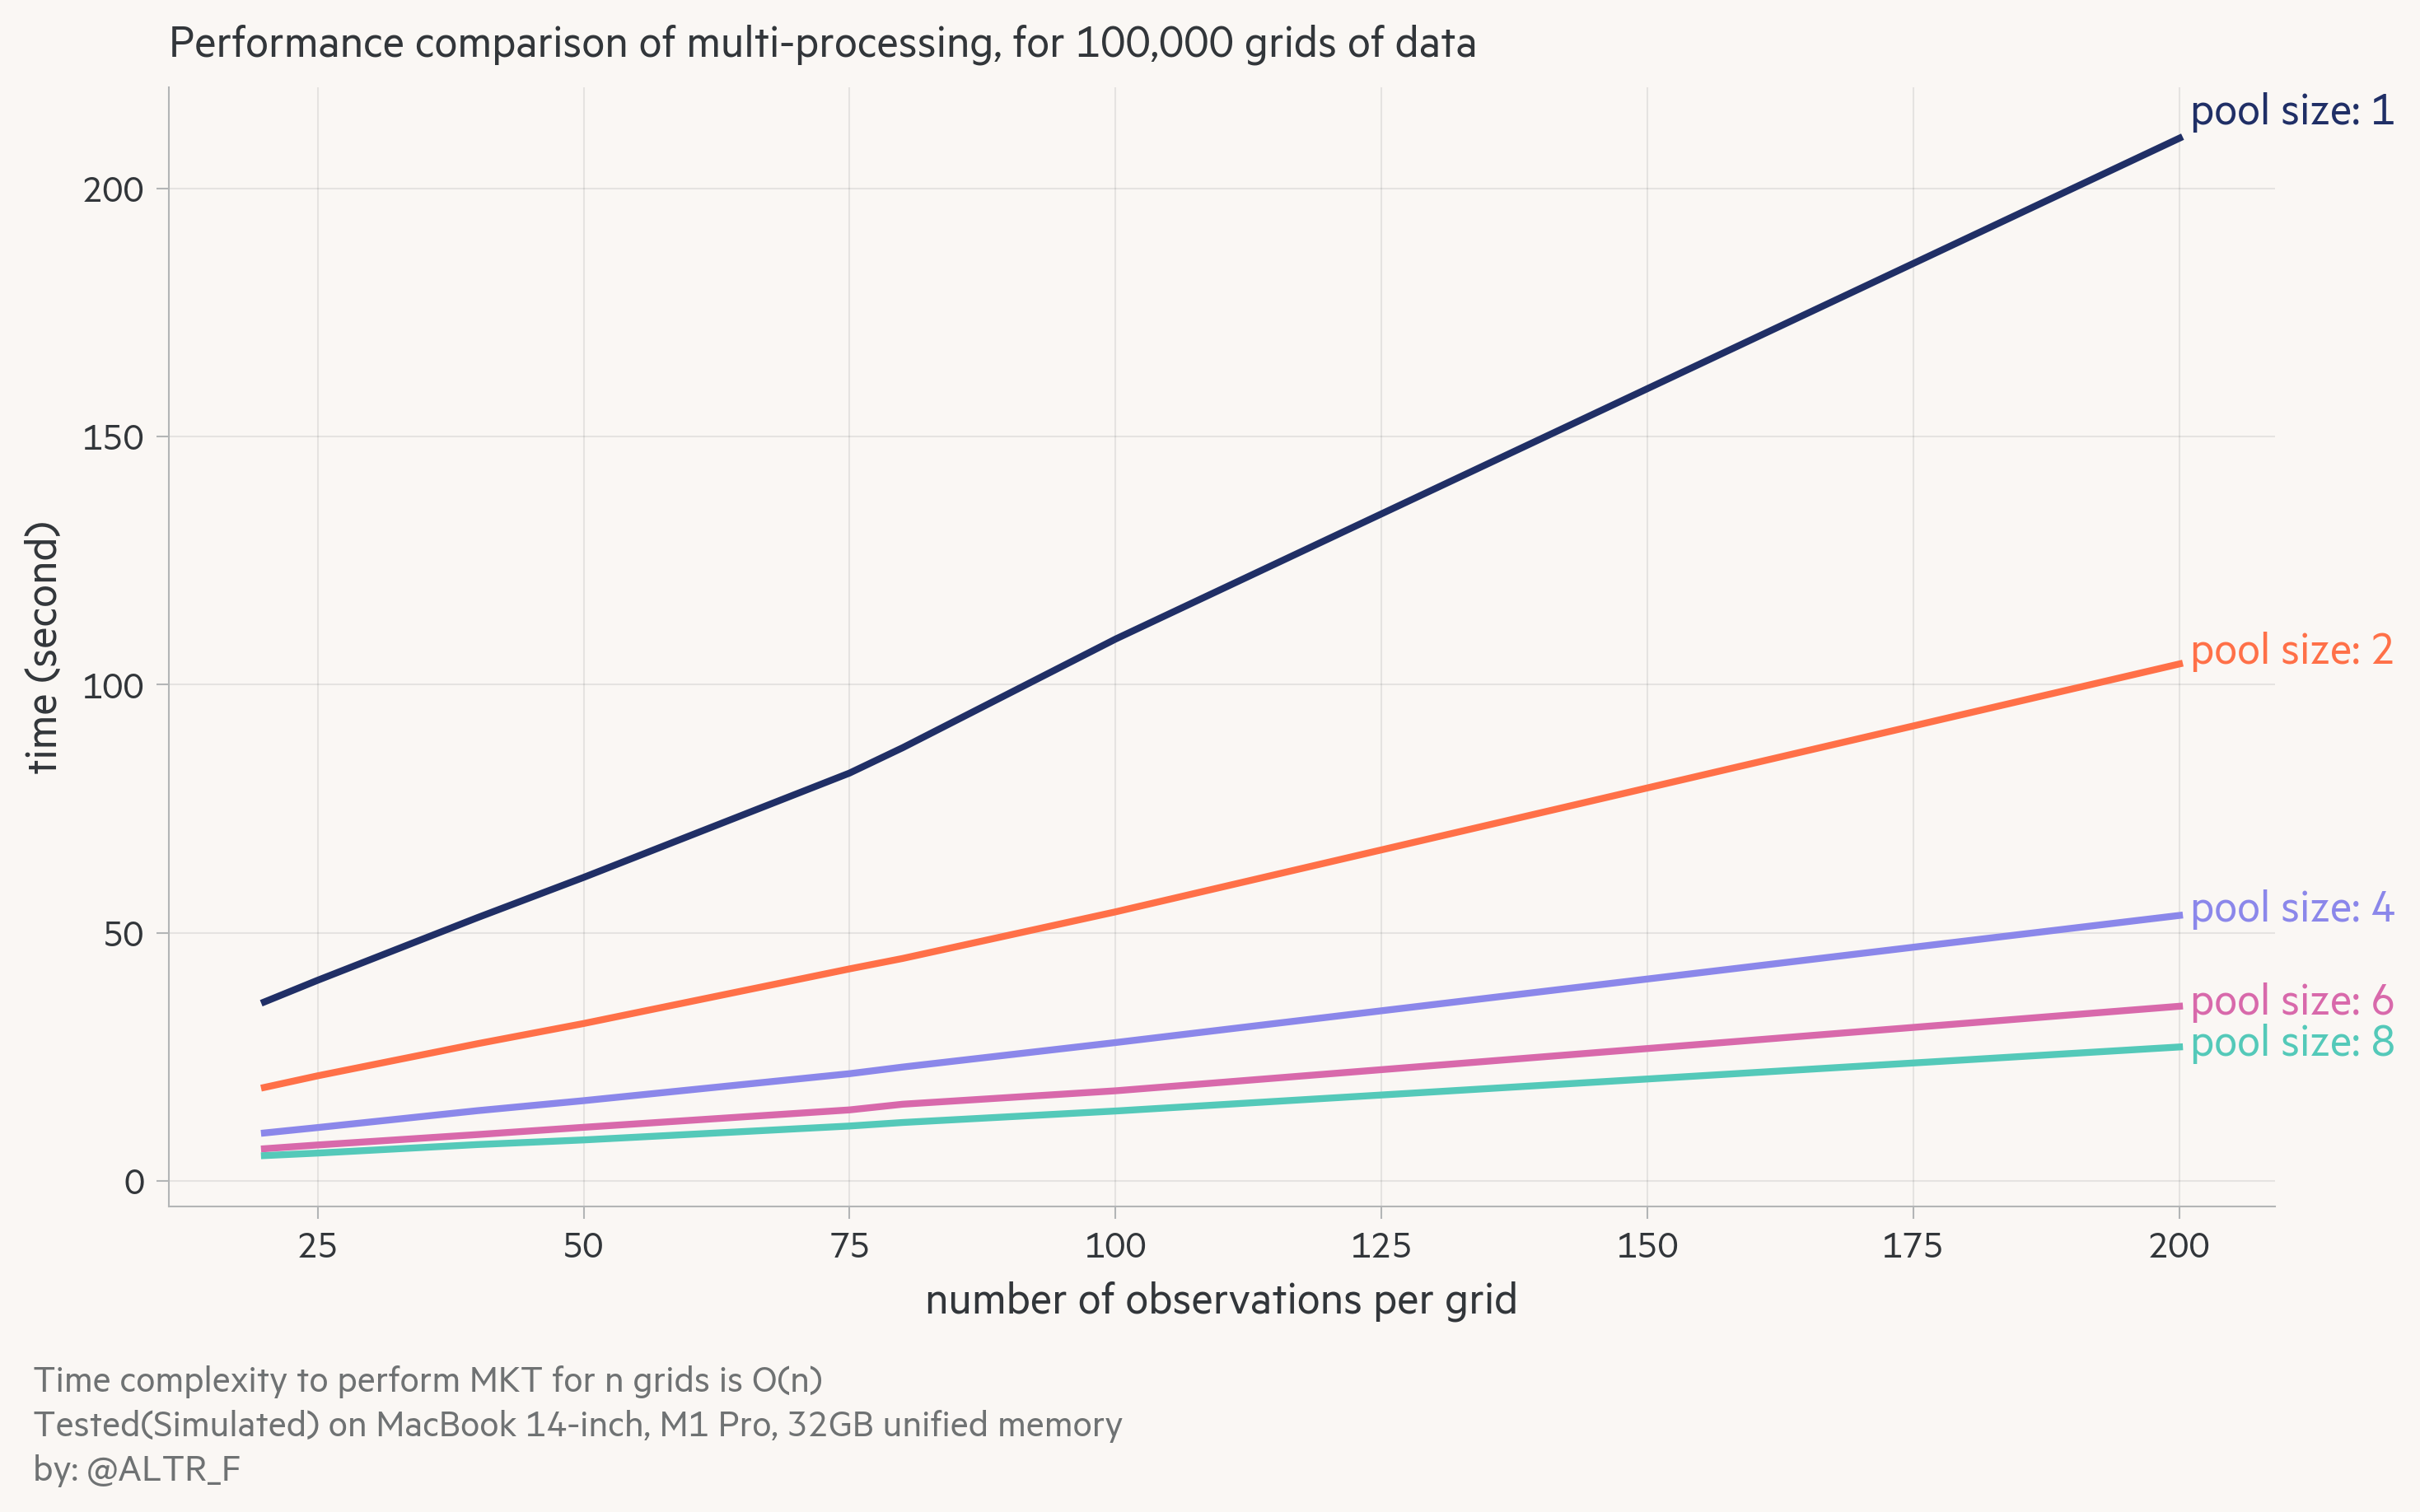

In [21]:
num_obs = 200
num_grids = 100000

fig = plt.figure(figsize=(11, 6))

for i, num_process in enumerate(df['pool_size'].unique()):
    dff = df[(df['num_grids'] == num_grids) & (df['pool_size'] == num_process) & (df['n'] <= num_obs)]
    sns.lineplot(dff['n'], dff['time_s'], color=_30k[i%len(_30k)])
    plt.text(dff['n'].iloc[-1]*1.005, y=dff['time_s'].iloc[-1]*1.025, 
             s=f"pool size: {num_process}", color=_30k[i%len(_30k)],
             va='center', ha='left'
            )

plt.ylabel("time (second)")
plt.xlabel("number of observations per grid")

plt.title(f"Performance comparison of multi-processing, for {num_grids:,d} grids of data")

plt.figtext(x=0.075, y=0, 
            s="Time complexity to perform MKT for n grids is O(n)", color=_30k_text['text_lighter1'],
            fontsize='small',
           )
plt.figtext(x=0.075, y=-0.03, 
            s="Tested(Simulated) on MacBook 14-inch, M1 Pro, 32GB unified memory", color=_30k_text['text_lighter1'],
            fontsize='small',
           )

plt.figtext(x=0.075, y=-0.06, 
            s="by: @ALTR_F", color=_30k_text['text_lighter1'],
            fontsize='small',
           )
plt.show()

In [25]:
df_speed_up = df[(df['num_grids'] == 100000) & (df['n'] == 100)]
df_speed_up['speed_up'] = np.round(np.max(df_speed_up['time_s'])/df_speed_up['time_s'], 2)
df_speed_up

,pool_size,n,num_grids,time_s,speed_up
116,1,100,100000,109.167766,1.00
237,2,100,100000,54.195329,2.01
358,4,100,100000,27.855893,3.92
479,6,100,100000,18.134169,6.02
600,8,100,100000,14.061656,7.76


In [24]:
num_grids = 100000
n = 100

t = df[(df['num_grids'] == num_grids) & (df['n'] == n) & (df['pool_size']==1)]['time_s'].values[0]

cores = np.array([1, 2, 4, 8, 16, 24, 32, 48, 64])

print(f"{num_grids:,d} grids - n={n}")

for i in cores:
    print(f"{i:2d}:", f"{round(t/i, 2):8.2f} s")

100,000 grids - n=100
 1:   109.17 s
 2:    54.58 s
 4:    27.29 s
 8:    13.65 s
16:     6.82 s
24:     4.55 s
32:     3.41 s
48:     2.27 s
64:     1.71 s
